Everything in this notebook is my work for the second exercise of the AML course.

# Pandas

(1) Load the data using Pandas.

In [1]:
import pandas as pd

df = pd.read_csv('GasPrices.csv')
# Drop the first column, because it is the same as the ID column. 
# The statistics of the column "ID" are also not intrested,
# since (I guess) it is only used for enumeration.
df = df.drop(columns=['Unnamed: 0', 'ID'])
df.head()

,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
2,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
3,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
4,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


(2) Summarize each numeric field in the data, i.e. mean, average, etc. 

In [2]:
# Summary of all the numeric fields
df.describe()

,Price,Pumps,Gasolines,Zipcode,Income
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.864257,6.950495,3.465347,78730.782178,56727.217822
std,0.081515,3.925242,0.557931,22.054298,25868.359804
min,1.730000,2.000000,1.000000,78701.000000,12786.000000
25%,1.790000,4.000000,3.000000,78704.000000,37690.000000
50%,1.850000,6.000000,3.000000,78731.000000,52306.000000
75%,1.920000,8.000000,4.000000,78752.000000,70095.000000
max,2.090000,24.000000,4.000000,78759.000000,128556.000000


In [3]:
# Extract just the mean value of each feature
print("Mean:\n", df.mean())

Mean:
 Price            1.864257
Pumps            6.950495
Gasolines        3.465347
Zipcode      78730.782178
Income       56727.217822
dtype: float64


In [4]:
# Extract just the median of each feature
print("Median:\n", df.median())

Median:
 Price            1.85
Pumps            6.00
Gasolines        3.00
Zipcode      78731.00
Income       52306.00
dtype: float64


In [5]:
# Extract just the standard deviation of each feature
print("Standard Deviation:\n", df.std())

Standard Deviation:
 Price            0.081515
Pumps            3.925242
Gasolines        0.557931
Zipcode         22.054298
Income       25868.359804
dtype: float64


(3) Group data by the field *Name*.

In [6]:
grouped_data = df.groupby('Name')

for name, group in grouped_data:
    print(f"Group name: {name}")
    print(group.head())
    print("\n")

Group name: 7-Eleven
        Name  Price  Pumps Interior Restaurant CarWash Highway Intersection  \
2   7-Eleven   1.88      4        Y          N       N       N            Y   
11  7-Eleven   1.97      4        Y          N       N       N            Y   
13  7-Eleven   1.95      4        Y          N       N       N            Y   
19  7-Eleven   1.73      8        Y          N       N       N            Y   
24  7-Eleven   1.84      6        Y          N       N       N            Y   

   Stoplight IntersectionStoplight  Gasolines Competitors  Zipcode  \
2          Y                  Both          3           Y    78751   
11         Y                  Both          3           N    78705   
13         Y                  Both          3           N    78701   
19         Y                  Both          4           Y    78722   
24         Y                  Both          4           N    78702   

              Address  Income  Brand  
2   5101 N Lamar Blvd   41279  Other  
11  2

           Name  Price  Pumps Interior Restaurant CarWash Highway  \
21  Phillips 66   1.85      6        Y          N       N       N   
79  Phillips 66   1.93      8        Y          N       Y       N   

   Intersection Stoplight IntersectionStoplight  Gasolines Competitors  \
21            Y         Y                  Both          4           Y   
79            Y         N          Intersection          3           Y   

    Zipcode                Address  Income  Brand  
21    78702      1149 Airport Blvd   37690  Other  
79    78703  2407 Lake Austin Blvd   81903  Other  


Group name: Shell
     Name  Price  Pumps Interior Restaurant CarWash Highway Intersection  \
0   Shell   1.79      4        Y          N       N       N            Y   
4   Shell   1.84      6        Y          N       N       N            Y   
5   Shell   1.83      8        Y          N       N       N            Y   
8   Shell   1.89      6        Y          N       N       N            Y   
12  Shell   1

(4) Find the average price, average income, and average number of pumps for each group.

In [7]:
grouped_data.agg(
    Average_Price=('Price', 'mean'),
    Average_Income=('Income', 'mean'),
    Average_Pumps=('Pumps', 'mean')
).reset_index()

,Name,Average_Price,Average_Income,Average_Pumps
0,7-Eleven,1.887778,53432.333333,4.666667
1,Around the Corner Store,1.940000,63750.000000,2.000000
2,Chevron,1.871818,61754.636364,8.727273
3,Citgo,1.835000,49387.000000,4.000000
4,Conoco,1.890000,43545.500000,4.000000
5,Costco,1.730000,70095.000000,12.000000
6,Double R Grocery,1.790000,37690.000000,4.000000
7,East 1st Grocery,1.770000,37690.000000,4.000000
8,Exxon,1.855000,52344.333333,11.500000
9,Gulf,1.788571,50084.142857,5.714286


(5) Use a boxplot that visualizes the statistical information about price, pumps and gasoline.

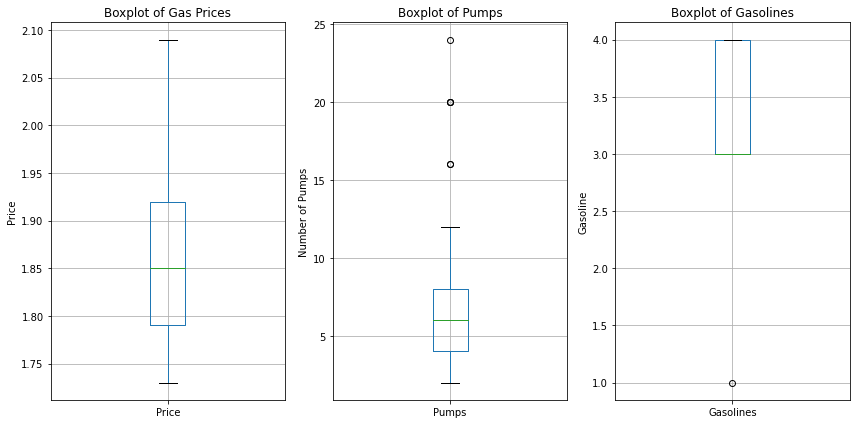

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot for Price for all the groups
plt.subplot(1, 3, 1)
df.boxplot(column='Price') 
plt.title('Boxplot of Gas Prices')
plt.ylabel('Price')

# Boxplot for Pumps for all the groups
plt.subplot(1, 3, 2)
df.boxplot(column='Pumps') 
plt.title('Boxplot of Pumps')
plt.ylabel('Number of Pumps')

# Boxplot for Gasoline for all the groups
plt.subplot(1, 3, 3)
df.boxplot(column='Gasolines')  
plt.title('Boxplot of Gasolines')
plt.ylabel('Gasoline')

# Show the plots
plt.tight_layout()
plt.show()

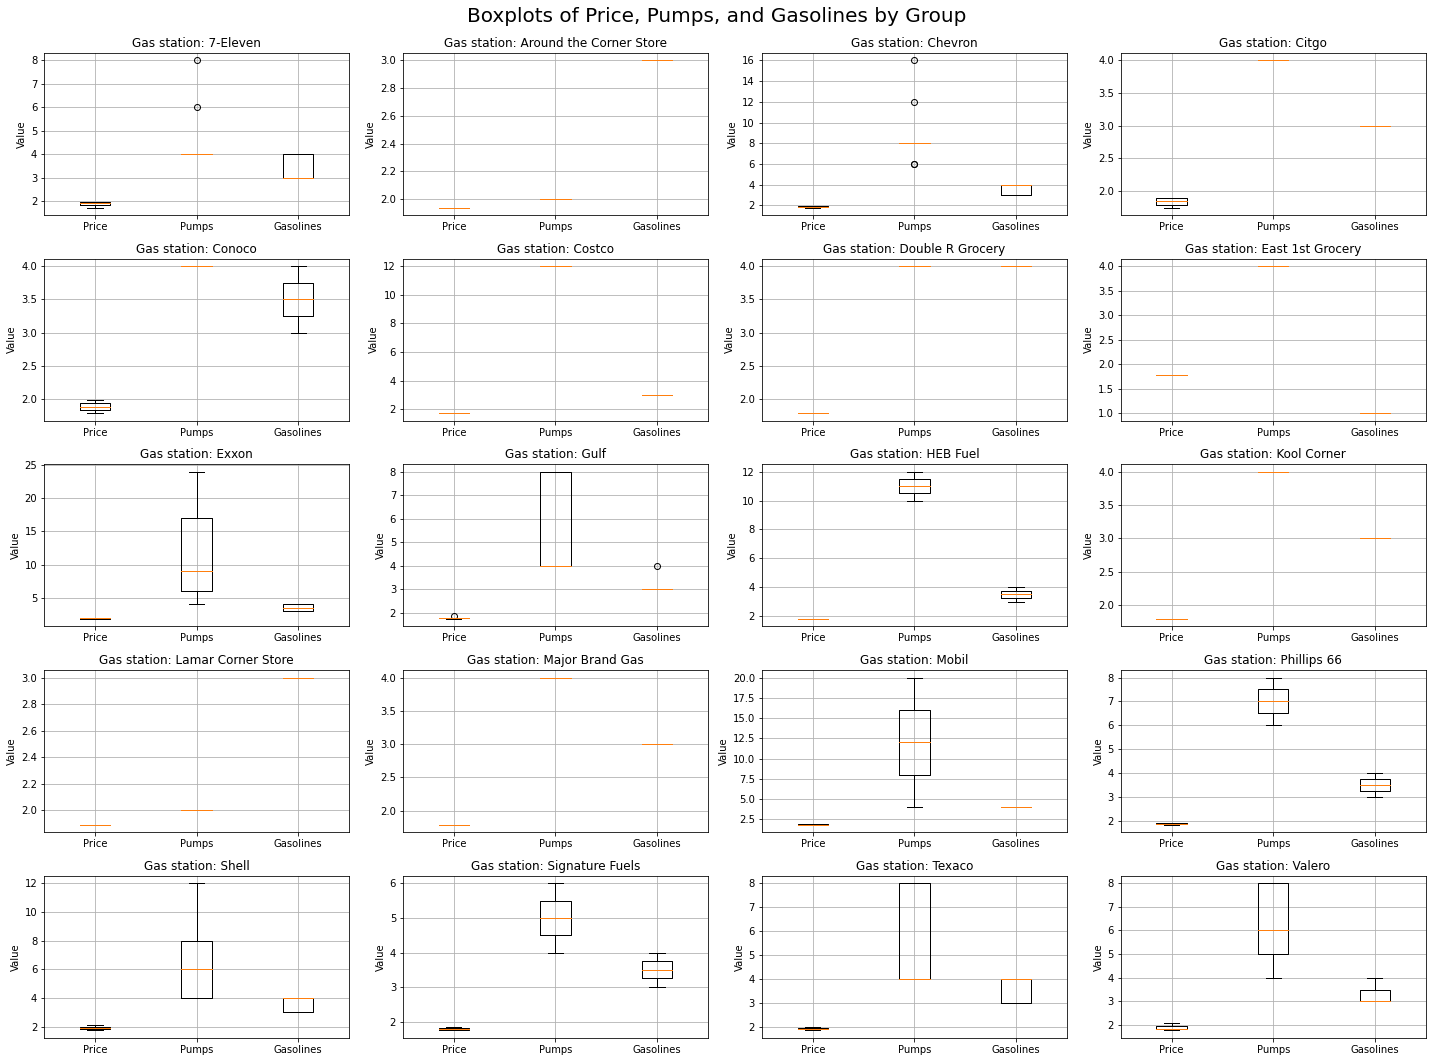

In [9]:
# Boxplots for each group individually
n_groups = len(grouped_data)
n_columns = 4 
n_rows = (n_groups + n_columns - 1) // n_columns  

fig, axs = plt.subplots(n_rows, n_columns, figsize=(20, 15))  
axs = axs.flatten()  

for i, (name, group_data) in enumerate(grouped_data):
    data_to_plot = [group_data['Price'], group_data['Pumps'], group_data['Gasolines']]
    labels = ['Price', 'Pumps', 'Gasolines']
    axs[i].boxplot(data_to_plot, labels=labels)
    axs[i].set_title(f'Gas station: {name}')
    axs[i].set_ylabel('Value')
    axs[i].grid()

fig.suptitle('Boxplots of Price, Pumps, and Gasolines by Group', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

(6) Use the *Price* and *Income* features to plot a prediction line similar to the first exercise. Normalize the *Income* and plot the line again. Comment on the difference between the two plots.

In [10]:
# I use my own implementation of Linear Regression: Simple LinReg. No difference with the real one.
import numpy as np

def learn_simple_linreg(x, y):
    x = np.array(x).flatten()  
    y = np.array(y).flatten()  
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculating the slope (beta_1) and intercept (beta_0)
    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

def predict_simple_linreg(x, beta_0, beta_1):    
    y_pred = beta_0 + beta_1 * x
    return y_pred

df = df[['Price', 'Income']].dropna()

X = df[['Income']] 
y = df['Price']  

beta_0, beta_1 = learn_simple_linreg(X.values, y)

income_range = np.linspace(X['Income'].min(), X['Income'].max(), 100)

pred_prices = predict_simple_linreg(income_range, beta_0, beta_1)


For data normalization, Z-Score and min-max normalization are often choices. Another technique to handle scaling issues is using Mahalanobis distance. Here, I use the min-max normalization technique as an example.

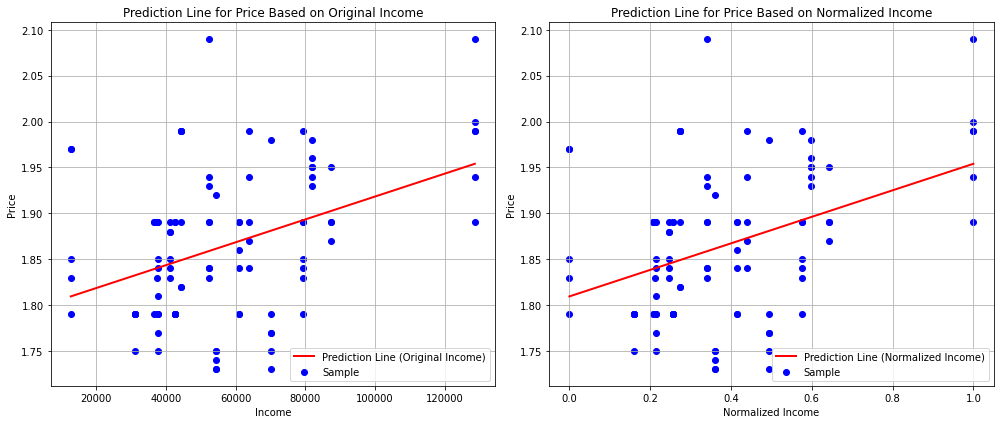

In [11]:
def min_max_normalize(df,columns):
    df_norm = df.copy()
    df_norm[columns] = (df_norm[columns] - df_norm[columns].min()) / (df_norm[columns].max() - df_norm[columns].min())
    return df_norm   

df_norm = min_max_normalize(df, ['Income'])
X = df_norm[['Income']]
y = df['Price']                         

beta_0_norm, beta_1_norm = learn_simple_linreg(X.values, y)

norm_income_range = np.linspace(df_norm['Income'].min(), df_norm['Income'].max(), 100)

pred_prices_norm = predict_simple_linreg(norm_income_range, beta_0_norm, beta_1_norm)

plt.figure(figsize=(14, 6))

# Plot for original data points
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], df['Price'], color='blue', label='Sample')
plt.plot(income_range, pred_prices, color='red', linewidth=2, label='Prediction Line (Original Income)')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('Prediction Line for Price Based on Original Income')
plt.legend()
plt.grid()

# Plot for normalized data points
plt.subplot(1, 2, 2)
plt.scatter(df_norm['Income'], y, color='blue', label='Sample')
plt.plot(norm_income_range, pred_prices_norm, color='red', linewidth=2, label='Prediction Line (Normalized Income)')
plt.xlabel('Normalized Income')
plt.ylabel('Price')
plt.title('Prediction Line for Price Based on Normalized Income')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Here, I did the same comparasion between the predictions for *Price* based on *Income* and base on normalized *Income*. I skipped the groups with one sample, because of min-max normalization. They wouldn't brings us a lot of information anyways.

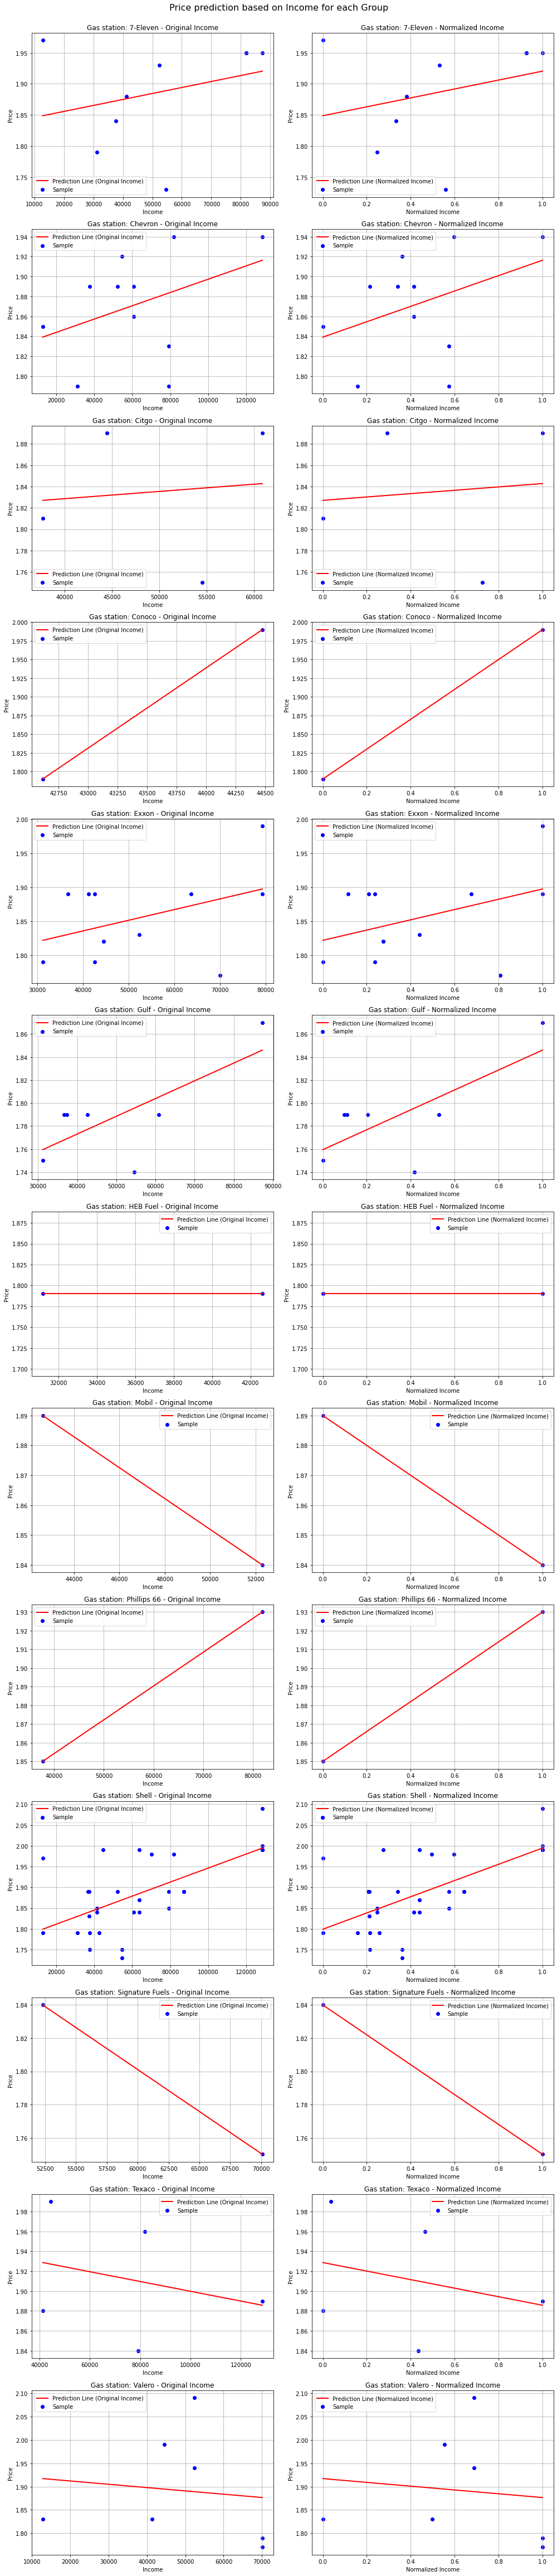

In [12]:

n_groups = len(grouped_data)
n_columns = 2 
n_rows = (n_groups * n_columns + n_columns - 1) // n_columns  

fig, axs = plt.subplots(n_rows, n_columns, figsize=(14, 5 * n_rows))
axs = axs.flatten()

plot_counter = 0

for i, (name, group_data) in enumerate(grouped_data):
    if len(group_data) <= 1:  # Skip groups with one or no points
       continue

    group_data = group_data[['Price', 'Income']].dropna()

    # Original Income Model
    X = group_data[['Income']]
    y = group_data['Price']  
    beta_0, beta_1 = learn_simple_linreg(X.values, y)

    income_range = np.linspace(X['Income'].min(), X['Income'].max(), 100)
    pred_prices = predict_simple_linreg(income_range, beta_0, beta_1)

    # Normalized Income Model
    df_norm = min_max_normalize(group_data, ['Income'])
    X_norm = df_norm[['Income']]
    y_norm = df_norm['Price']  
    beta_0_norm, beta_1_norm = learn_simple_linreg(X_norm.values, y_norm)

    norm_income_range = np.linspace(df_norm['Income'].min(), df_norm['Income'].max(), 100)
    pred_prices_norm = predict_simple_linreg(norm_income_range, beta_0_norm, beta_1_norm)

    # Plot for original data points
    axs[plot_counter * 2].scatter(X, y, color='blue', label='Sample')
    axs[plot_counter * 2].plot(income_range, pred_prices, color='red', linewidth=2, label='Prediction Line (Original Income)')
    axs[plot_counter * 2].set_xlabel('Income')
    axs[plot_counter * 2].set_ylabel('Price')
    axs[plot_counter * 2].set_title(f'Gas station: {name} - Original Income')
    axs[plot_counter * 2].legend()
    axs[plot_counter * 2].grid()

    # Plot for normalized data points
    axs[plot_counter * 2 + 1].scatter(df_norm['Income'], y_norm, color='blue', label='Sample')
    axs[plot_counter * 2 + 1].plot(norm_income_range, pred_prices_norm, color='red', linewidth=2, label='Prediction Line (Normalized Income)')
    axs[plot_counter * 2 + 1].set_xlabel('Normalized Income')
    axs[plot_counter * 2 + 1].set_ylabel('Price')
    axs[plot_counter * 2 + 1].set_title(f'Gas station: {name} - Normalized Income')
    axs[plot_counter * 2 + 1].legend()
    axs[plot_counter * 2 + 1].grid()

    plot_counter += 1

for j in range(plot_counter * 2, len(axs)):
   fig.delaxes(axs[j])

plt.suptitle('Price prediction based on Income for each Group', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.98])  
plt.show()

#### **Analysis of original and normalized data**
 As expected, the plots look exactly the same; they just differ in the scale of the feature. This makes sense since we only have one feature. A better approach would be to include more than one feature, so we could see how normalization helps. Normalizing all the features is useful because it ensures they contribute equally to the prediction. When you use just one feature, you can’t really see this benefit since the relationship of the feature with all other feature (i.e just itself) remains unchanged.

# Linear Regression via Normal Equations

(1) Load it as Xdata.

In [13]:
Xdata = pd.read_csv('GasPrices.csv')
Xdata.head()

,Unnamed: 0,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
2,3,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
3,4,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
4,5,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


(2) Choose columns that help with prediction (i.e., contain useful information). Drop irrelevant
columns, and explain your reasoning for choosing or dropping any column.

#### **Preprocessing of the data**

##### **Which columns are removed and why?**
* I started by computing the correlation matrix to check out the relationships between the features, which is part of my exploratory data analysis (EDA). I noticed that the columns "ID" and "Unnamed: 0" have the same values, so I decided to remove one of them - specifically "Unnamed: 0" - because they provide the same information and would just slow things down. I also got rid of the "ID" column since it’s just for enumeration.

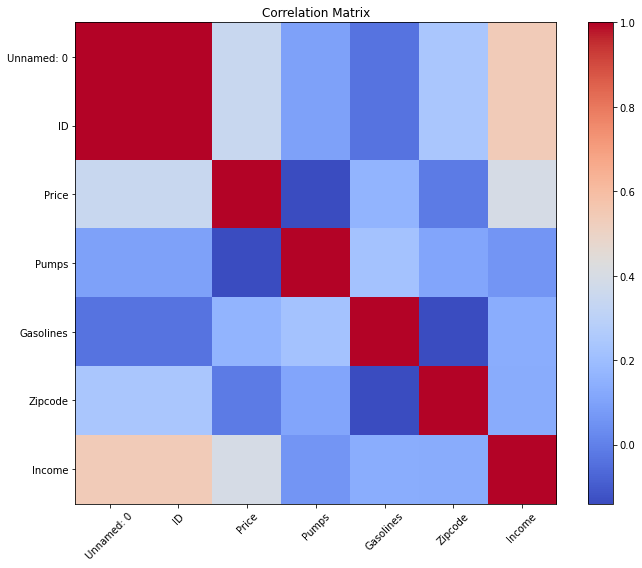

In [14]:
# Create correlation matrix and visualize it
corr_mat = Xdata.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_mat, cmap='coolwarm', interpolation='nearest')
plt.colorbar() 
plt.xticks(np.arange(len(corr_mat.columns)), corr_mat.columns, rotation=45)
plt.yticks(np.arange(len(corr_mat.columns)), corr_mat.columns)
plt.grid(False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

* Next, I removed the "IntersectionSpotlight" column because we already have that info in two separate columns.

* The "Address" column has unique values, but it wouldn't really help the model learn anything useful. In fact, it could even cause overfitting. We’ve got better location info with the "Highway" and "Zipcode" columns.

* The "Name" column isn’t needed either because we already have the "Brand" column, and since gas station names are relatively (i.e. almost fully) unique, it might lead to overfitting.

* I also decided to drop the "Intersection" and "Restaurant" columns since they have really low variance. Their mean values are super close to either 0 or 1, which means that the gas stations mostly have either 1s or 0s in those columns - so they don’t add much useful info.

In [15]:
Ydata = Xdata['Price']
replace_columns = ['Competitors', 'CarWash', 'Highway', 'Interior', 'Stoplight', 'Intersection', 'Restaurant']
Xdata[replace_columns] = Xdata[replace_columns].replace({'Y':1, 'N':0})
Xdata.describe()

,Unnamed: 0,ID,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,Gasolines,Competitors,Zipcode,Income
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,51.000000,1.864257,6.950495,0.881188,0.079208,0.178218,0.217822,0.930693,0.623762,3.465347,0.495050,78730.782178,56727.217822
std,29.300171,29.300171,0.081515,3.925242,0.325181,0.271410,0.384605,0.414824,0.255242,0.486857,0.557931,0.502469,22.054298,25868.359804
min,1.000000,1.000000,1.730000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,78701.000000,12786.000000
25%,26.000000,26.000000,1.790000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,78704.000000,37690.000000
50%,51.000000,51.000000,1.850000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,78731.000000,52306.000000
75%,76.000000,76.000000,1.920000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,78752.000000,70095.000000
max,101.000000,101.000000,2.090000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,78759.000000,128556.000000


When we remove features, we have to be careful because we might miss some important relationships. There could be factors that aren’t obvious, like the exact location of the gas station (e.g., if it has four pumps but nobody ever uses them because the area isn’t busy), what’s happening nearby, how far the next gas station is, the company’s connections to other businesses, or their overall strategy. There are plenty of other factors to consider too.

**Conclusion**: Removing features is hard. You will often need an expert's assistance to do this. 

##### **Mapping**

I converted the 'Yes / No' columns to '1 / 0' columns, as this will allow me to use them in the linear regression analysis. I use one-hot encoding for column 'Brand' for the same reason.

In [ ]:
Xdata = Xdata.drop(columns=['Unnamed: 0', 'ID', 'Price', 'IntersectionStoplight', 'Address', 'Intersection', 'Restaurant', 'Name'])
Xdata = pd.get_dummies(Xdata, columns=['Brand'], drop_first=True)
Xdata.head()

,Pumps,Interior,CarWash,Highway,Stoplight,Gasolines,Competitors,Income,Brand_ExxonMobil,Brand_Other,Brand_Shell
0,4,1,0,0,0,3,0,12786,0,0,1
1,4,1,0,0,0,3,0,12786,0,1,0
2,4,1,0,0,1,3,1,41279,0,1,0
3,4,1,1,0,1,4,1,41279,0,0,0
4,6,1,0,0,1,3,0,41279,0,0,1


(3) Split your dataset *Xdata*, *Ydata* into *Xtrain*, *Ytrain*, and *Xtest*, *Ytest* (randomly assign 80% to *Xtrain*, *Ytrain* and the remaining 20% to *Xtest*, *Ytest*).

In [17]:
np.random.seed(18)

def split_data(Xdata, Ydata, train_percent):
    split_index = int(train_percent * len(Xdata))

    indices = np.arange(len(Xdata))
    np.random.shuffle(indices)

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    Xtrain = Xdata.iloc[train_indices].reset_index(drop=True)
    Ytrain = Ydata.iloc[train_indices].reset_index(drop=True)
    Xtest = Xdata.iloc[test_indices].reset_index(drop=True)
    Ytest = Ydata.iloc[test_indices].reset_index(drop=True)
    
    return Xtrain, Ytrain, Xtest, Ytest

Xtrain, Ytrain, Xtest, Ytest = split_data(Xdata, Ydata, 0.8)

(4) Implement the *learn_linreg_normeq* algorithm and learn a parameter vector $\beta$ using the *Xtrain* set and 
* Gaussian Elimination
* Cholesky decomposition 
* QR decomposition. 

I implemented the functions *safe_divide* and *safe_sqrt*. Sometimes in the Cholesky decomposition, $A_{ii}$ is 0 and the variable *summ* is positive, which leads to square of negative number. In order to not throw an error (which just wouldn't good in the code), I also implemented the *safe_sqrt*. The *safe_divide* is, because the Gaussian decomposition still throws an error ($A_{ii}$ is 0) for Cholesky decomposition. Later, I explain what actually causes the error (see last paragraph). 

In [18]:
from scipy.linalg import solve

def safe_divide(x, y):
    return x / y if y != 0 else 0

def safe_sqrt(x):
    return np.sqrt(x) if x >= 0 else 0

# Cholesky decomposition
# Links: https://algowiki-project.org/en/Cholesky_decomposition  
def cholesky(A):
    n = len(A)
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i + 1):
            summ = sum(L[i][p] * L[j][p] for p in range(j))

            if i == j:  # Diagonal elements
                L[i][j] = safe_sqrt(A[i][i] - summ)
            else:
                L[i][j] = safe_divide(A[i][j] - summ, L[j][j])
    return L 

# QR decomposition using the Gram-Schmidt process.
# Links: https://en.wikipedia.org/wiki/QR_decomposition
def qr(A):
    n, m = A.shape
    Q = np.zeros((n, n))  # Initialize Q
    R = np.zeros((n, m))  # Initialize R
    
    for i in range(n):
        u = A[:, i].astype(float)

        for j in range(i):
            proj = np.dot(Q[:, j], u) 
            u -= proj * Q[:, j]  

        Q[:, i] = u / np.linalg.norm(u)

        for j in range(i, m):
            R[i, j] = np.dot(Q[:, i], A[:, j])

    return Q, R

# Gaussian elimination with partial pivoting.
# Links: https://sites.engineering.ucsb.edu/~hpscicom/projects/gauss/introge.pdf
# https://www.youtube.com/watch?v=3aO2eG9lGk4
def gaussian_elimination(A, b):
    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)]).astype(float)

    # Forward elimination
    for i in range(n):
        # Partial pivoting
        max_row_i = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row_i]] = Ab[[max_row_i, i]]
        
        for j in range(i + 1, n):
            u = safe_divide(Ab[j, i], Ab[i, i])
            Ab[j] -= u * Ab[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = safe_divide((Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])), Ab[i, i])

    return x

def cholesky_decomposition(A, b):
    L = cholesky(A)
    y = gaussian_elimination(L, b)
    return gaussian_elimination(L.T, y)

def qr_decomposition(A, b):
    Q, R = qr(A)
    return gaussian_elimination(R, np.dot(Q.T, b))

def scipy(A,b):
    return solve(A,b)

methods = {
        "GE": gaussian_elimination,
        "CD": cholesky_decomposition,
        "QRD": qr_decomposition,
        "SciPy": scipy
    }

def learn_linreg_normeq(X, y, solve_sle="GE"):
    X = X.values
    y = y.values

    A = np.dot(X.T, X)
    b = np.dot(X.T, y) 
    
    if solve_sle in methods:
        return methods[solve_sle](A, b) # i.e. beta
    else:
        raise ValueError(f"Invalid option for solve_sle: {solve_sle}. Choose 'GE', 'CD', or 'QRD'.")

def predict(Xtest, beta):
    return np.dot(Xtest.values, beta)

def rmse(Ytest, y_pred):
    return np.sqrt(np.mean((Ytest-y_pred)**2))


(5) Perform predictions $\hat{y}$ on the test dataset *Xtest* using the parameters learned.


In [19]:
# Learn betas via Gaussian Elimination
beta_ge = learn_linreg_normeq(Xdata, Ydata, "GE")
print(beta_ge)

# Learn betas via Cholesky decomposition
beta_cd = learn_linreg_normeq(Xdata, Ydata, "CD")
print(beta_cd)

# Learn betas via QR decomposition
beta_qrd = learn_linreg_normeq(Xdata, Ydata, "QRD")
print(beta_qrd)

beta_sp = learn_linreg_normeq(Xdata, Ydata, "SciPy")
print(beta_sp)

y_hat_ge = predict(Xtest, beta_ge)
y_hat_cd = predict(Xtest, beta_cd)
y_hat_qrd = predict(Xtest, beta_qrd)
y_hat_sp = predict(Xtest, beta_sp)

[ 3.09725681e-03  3.34638456e-01  3.02381800e-02 -3.59820119e-03
  2.93314072e-02  3.02958211e-01 -3.64298120e-02  4.75683570e-06
  1.69557104e-01  3.12974869e-01  1.67382182e-01]
[-1.89507920e-02 -8.63147336e-01  2.15748891e-02 -1.91783118e-01
  5.38639068e-02  6.63419729e-01  1.77960201e-01  1.84518237e-06
  4.56007495e-01  4.04966622e-01  0.00000000e+00]
[ 3.09693729e-03  3.34637309e-01  3.02494253e-02 -3.58695126e-03
  2.93338674e-02  3.02956982e-01 -3.64437012e-02  4.75675299e-06
  1.69567029e-01  3.12993724e-01  1.67397076e-01]
[ 3.09725681e-03  3.34638456e-01  3.02381800e-02 -3.59820119e-03
  2.93314072e-02  3.02958211e-01 -3.64298120e-02  4.75683570e-06
  1.69557104e-01  3.12974869e-01  1.67382182e-01]


(5) The final step is to find how close these three models are to the original values.

* Plot the residual $\epsilon$ = |$Y_{test}$ − $\hat{y}$| versus the true value of ytest for each model.

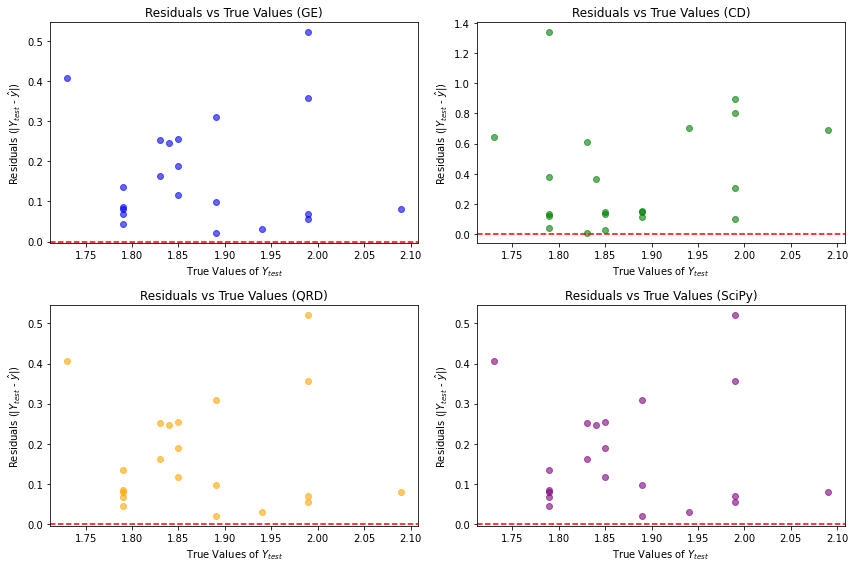

In [20]:
residuals_ge= np.abs(Ytest.values - y_hat_ge)
residuals_cd = np.abs(Ytest.values - y_hat_cd)
residuals_qrd = np.abs(Ytest.values - y_hat_qrd)
residuals_sp = np.abs(Ytest.values - y_hat_sp)

plt.figure(figsize=(12, 8))

# Gaussian Elimination Residuals
plt.subplot(2, 2, 1)
plt.scatter(Ytest, residuals_ge, color='blue', alpha=0.6)
plt.title('Residuals vs True Values (GE)')
plt.xlabel('True Values of $Y_{test}$')
plt.ylabel('Residuals (|$Y_{test}$ - $\hat{y}$|)')
plt.axhline(0, color='red', linestyle='--')

# Cholesky Decomposition Residuals
plt.subplot(2, 2, 2)
plt.scatter(Ytest, residuals_cd, color='green', alpha=0.6)
plt.title('Residuals vs True Values (CD)')
plt.xlabel('True Values of $Y_{test}$')
plt.ylabel('Residuals (|$Y_{test}$ - $\hat{y}$|)')
plt.axhline(0, color='red', linestyle='--')

# QR Decomposition Residuals
plt.subplot(2, 2, 3)
plt.scatter(Ytest, residuals_qrd, color='orange', alpha=0.6)
plt.title('Residuals vs True Values (QRD)')
plt.xlabel('True Values of $Y_{test}$')
plt.ylabel('Residuals (|$Y_{test}$ - $\hat{y}$|)')
plt.axhline(0, color='red', linestyle='--')

# SciPy Residuals
plt.subplot(2, 2, 4)
plt.scatter(Ytest, residuals_sp, color='purple', alpha=0.6)
plt.title('Residuals vs True Values (SciPy)')
plt.xlabel('True Values of $Y_{test}$')
plt.ylabel('Residuals (|$Y_{test}$ - $\hat{y}$|)')
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

* Find the average residual $\epsilon$ = |$Y_{test}$ − $\hat{y}$| for each model.

In [21]:
avg_residual_ge = np.mean(np.abs(residuals_ge))
avg_residual_cd = np.mean(np.abs(residuals_cd))
avg_residual_qrd = np.mean(np.abs(residuals_qrd))
avg_residual_sp = np.mean(np.abs(residuals_sp))

print(f'Average Residual (Gaussian Elimination): {avg_residual_ge:.4f}')
print(f'Average Residual (Cholesky Decomposition): {avg_residual_cd:.4f}')
print(f'Average Residual (QR Decomposition): {avg_residual_qrd:.4f}')
print(f'Average Residual (SciPy): {avg_residual_qrd:.4f}')

Average Residual (Gaussian Elimination): 0.1705
Average Residual (Cholesky Decomposition): 0.3741
Average Residual (QR Decomposition): 0.1705
Average Residual (SciPy): 0.1705


* Compute the root-mean-square error (RMSE) as follows for each model.

In [22]:
rmse_ge = rmse(Ytest, y_hat_ge)
rmse_cd = rmse(Ytest, y_hat_cd)
rmse_qrd = rmse(Ytest, y_hat_qrd)
rmse_sp = rmse(Ytest, y_hat_sp)


print(f'RMSE (Gaussian Elimination): {rmse_ge:.4f}')
print(f'RMSE (Cholesky Decomposition): {rmse_cd:.4f}')
print(f'RMSE (QR Decomposition): {rmse_qrd:.4f}')
print(f'RMSE (SciPy): {rmse_sp:.4f}')

RMSE (Gaussian Elimination): 0.2170
RMSE (Cholesky Decomposition): 0.5116
RMSE (QR Decomposition): 0.2170
RMSE (SciPy): 0.2170


##### **Analysis of Linear Regression using Gaussian Elimination, Cholesky decomposition and QR decomposition**

All in all, we are solving the same problem, when using the three methods. We see different values, when we use Cholesky Decomposition, but this is because our data isn't symmetric and isn't positiv definite (which caused me implement the *safe_sqrt* and *safe_divide*). Gaussian elimination didn't gave great accuracy on its own, so I decided to add partial pivoting to make it more stable. The SciPy library uses LU decomposition, which produces very accurate results, and with QR decomposition and GE and simply GE were they almost achieved (less than 0.0001 difference).